In [1]:
from dask import dataframe as dd

table = dd.read_parquet(
    's3://imos-data-lab-optimised/parquet/trajectory/',
    columns=["temp", "depth"],
    filters=[
            [
                ('filename', '=', 'IMOS_ANFOG_BCEOPSTUV_20170110T013201Z_SG540_FV01_timeseries_END-20170131T204838Z.nc'),
                ('filename', '=', 'IMOS_ANFOG_BCEOPSTUV_20090526T034420Z_SG155_FV01_timeseries_END-20090803T081406Z.nc'),
            ]
        ],
    engine="pyarrow",
    split_row_groups=10
).compute()

len(table)

0

In [3]:
import xarray as xr

ds = xr.Dataset(table)

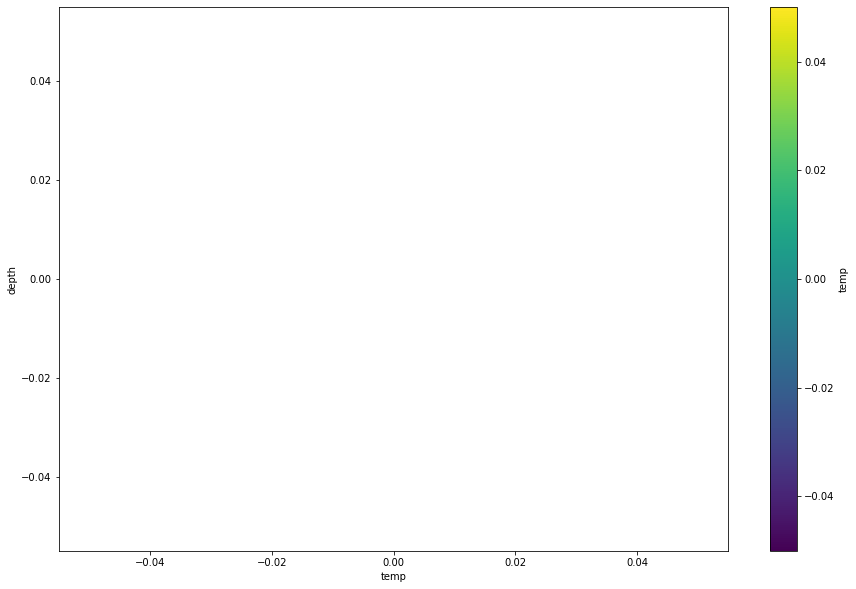

In [4]:
ds.plot.scatter(x="temp", y="depth", hue="temp", size=10)

In [2]:
import fsspec

with fsspec.open("s3://imos-data-lab-raw/temp/seaglider2/Leeuwin20140901/IMOS_ANFOG_BCEOPSTUV_20140901T044505Z_SG540_FV01_timeseries_END-20141118T204757Z.nc", "rb") as f:
    data = xr.open_dataset(f)

with fsspec.open("s3://imos-data-lab-raw/temp/seaglider2/Portland20090526/IMOS_ANFOG_BCEOPSTUV_20090526T034420Z_SG155_FV01_timeseries_END-20090803T081406Z.nc"), "rb") as f:
    data2 = xr.opendataset(f)

SyntaxError: unmatched ')' (<ipython-input-2-00722a762c6e>, line 6)

In [ ]:
data = data.merge(data2)

<xarray.Dataset>
Dimensions:                    (TIME: 697142)
Coordinates:
  * TIME                       (TIME) datetime64[ns] 2014-09-01T04:45:04.9999...
    LATITUDE                   (TIME) float64 ...
    LONGITUDE                  (TIME) float64 ...
    DEPTH                      (TIME) float64 ...
Data variables: (12/43)
    PLATFORM                   |S1 ...
    DEPLOYMENT                 |S1 ...
    SENSOR1                    |S1 ...
    SENSOR2                    |S1 ...
    SENSOR3                    |S1 ...
    TIME_quality_control       (TIME) float32 ...
    ...                         ...
    CDOM                       (TIME) float64 ...
    CDOM_quality_control       (TIME) float32 ...
    VBSC                       (TIME) float64 ...
    VBSC_quality_control       (TIME) float32 ...
    BBP                        (TIME) float64 ...
    BBP_quality_control        (TIME) float32 ...
Attributes: (12/46)
    project:                          Integrated Marine Observing System (IMOS)
    institution:                      ANFOG (Australian National Facility for...
    references:                       http://www.imos.org.au; "ANFOG Data Man...
    naming_authority:                 IMOS
    cdm_data_type:                    Trajectory
    data_centre:                      Australian Ocean Data Network (AODN)
    ...                               ...
    time_coverage_start:              2014-09-01T04:45:05Z
    time_coverage_end:                2014-11-18T20:47:57Z
    compliance_checks_passed:         cf imos:1.4
    compliance_checker_version:       2.3.1
    compliance_checker_imos_version:  1.1.3
    history:                          2018-02-13 03:29:10 UTC: passed complia...

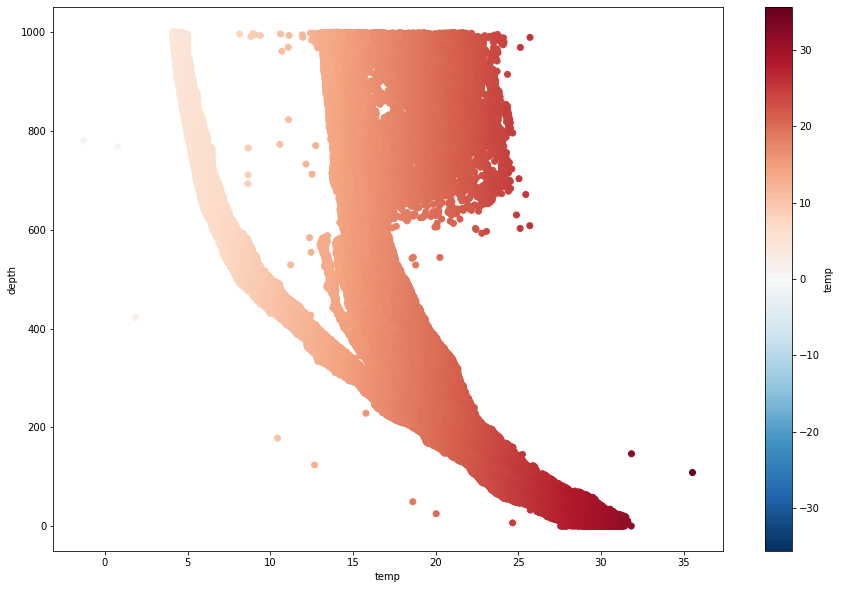

In [12]:
ds.plot.scatter(x="temp", y="depth", hue="temp", size=10)